***K-means Clustering Algorithm to Group Customers Based on Their Purchase History***

*Importing Required Libraries*

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

*Undersstand The Dataset*

In [28]:
#Load dataset
df = pd.read_csv('Mall_Customers.csv')

#show first few rows 
print(df.head(20))

#show info
# print(df.info())

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99
12          13  Female   58                  20                 

*Process the data*

In [19]:
#select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Normalize data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

*Find Optional Number Of Clusters(Elbow Method)*

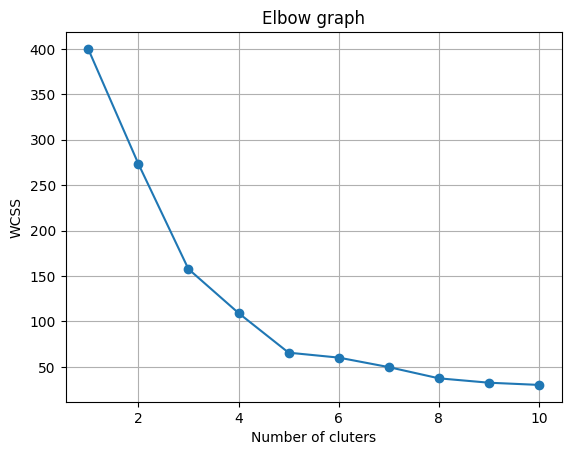

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

# Plot Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Number of cluters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show() 


*Apply K-Means Clustering*

In [23]:
# Assuming optimal clusters = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster info to the dataframe
df['Cluster'] = y_kmeans 

*Visualize the Clusters*

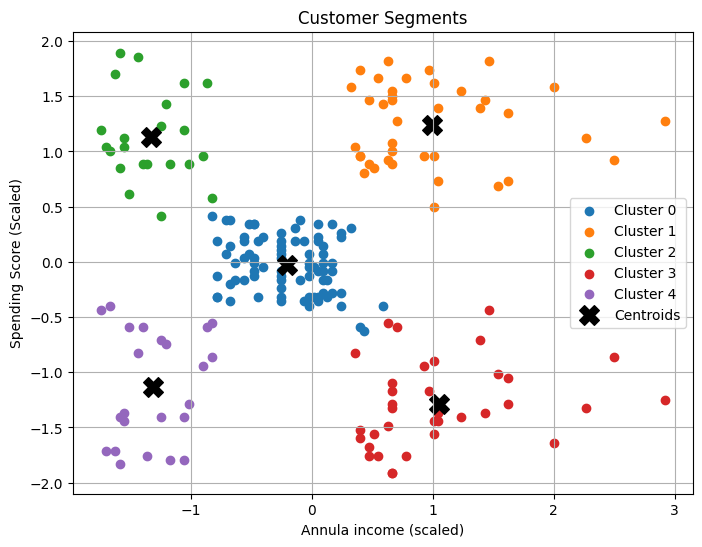

In [25]:
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(
        X_scaled[y_kmeans == cluster, 0],
        X_scaled[y_kmeans == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annula income (scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True)
plt.show() 